## Observations and Insights

1) Capomulin drug has the highest number of data points available in the study
2) Equal no. of male and female mice considered for the study
3) For Capomulin treatment, weight of the mouse is linearly positively correlated with the Average tumor volume. As the weight of the mouse increases , the average volume of the tumor increases

Assumptions:
1) Final tumor volume for each mouse is the tumor volume at the last timepoint available in the study. For some mice, timepoint 45 is not present. So, tumor volume calculated by taking the MAX of the timepoint for each mouse.

## Dependencies and starter code

In [332]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_data = study_results.merge(mouse_metadata,how="inner",on="Mouse ID")

## Summary statistics

In [333]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
merged_data_groupby = merged_data.groupby("Drug Regimen")
vol_mean = merged_data_groupby["Tumor Volume (mm3)"].mean()
vol_median = merged_data_groupby["Tumor Volume (mm3)"].median()
vol_variance = merged_data_groupby["Tumor Volume (mm3)"].var()
vol_std = merged_data_groupby["Tumor Volume (mm3)"].std()
vol_sem = merged_data_groupby["Tumor Volume (mm3)"].sem()
summary_regimen_df = pd.DataFrame({
    "Mean":vol_mean,"Median":vol_median,"Variance":vol_variance,
    "Standard Deviation":vol_std,
    "SEM":vol_sem
})
summary_regimen_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'No. of Data points')

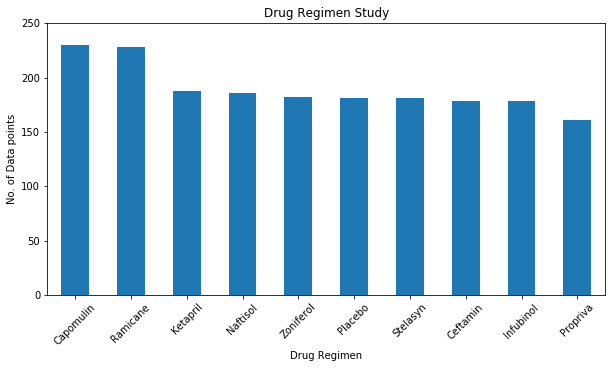

In [335]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# Calculating the no. of data points for each drug
drug_data_points = merged_data["Drug Regimen"].value_counts()
#Plotting bar chart using pandas plot
df_plot = drug_data_points.plot(kind="bar",use_index=True,title="Drug Regimen Study",figsize=(10,5),xlim=(-0.75,10.25),ylim=(0,250),rot=45,width=0.5)
df_plot.set_xlabel("Drug Regimen")
df_plot.set_ylabel("No. of Data points")

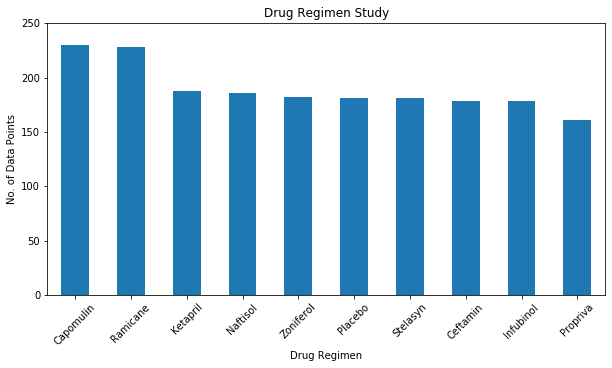

In [336]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(10,5))
plt.bar(drug_data_points.index,drug_data_points.values,align='center',width=0.5)
plt.xlim(-0.5, 9.5)
plt.ylim(0,250)
plt.xticks(range(10),drug_data_points.index,rotation=45)
plt.title("Drug Regimen Study")
plt.xlabel("Drug Regimen")
plt.ylabel("No. of Data Points")
plt.show()

## Pie plots

Text(0, 0.5, 'Gender')

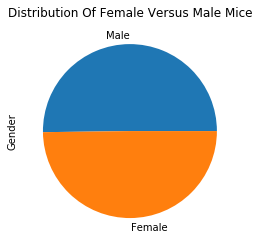

In [337]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_count = mouse_metadata["Sex"].value_counts()
gender_list = gender_count.keys()

pie_plot = gender_count.plot(kind="pie", y=gender_list, title="Distribution Of Female Versus Male Mice")
pie_plot.set_ylabel("Gender")

Text(0, 0.5, 'Gender')

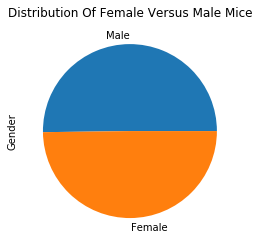

In [338]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count_array = gender_count.values
plt.pie(gender_count_array,labels=gender_list)
plt.title("Distribution Of Female Versus Male Mice")
plt.ylabel("Gender")

## Quartiles, outliers and boxplots

In [340]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

# To get the final tumor volume we need to calculate the tumor volume at the last Timepoint

# Create a DatFrame containing the four most promising treatment regimens
dr_data_df = merged_data.loc[(merged_data["Drug Regimen"]=="Capomulin") | (merged_data["Drug Regimen"]=="Ramicane") |
               (merged_data["Drug Regimen"]=="Infubinol") | (merged_data["Drug Regimen"]=="Ceftamin")]

# Group by Mouse ID to find the last timepoint for each mouse
time = dr_data_df.groupby("Mouse ID")["Timepoint"].max()

# Merge time and dr_data_df to get the final tumor volume 
dr_data_merge = pd.merge(dr_data_df,time,how="inner",on=["Mouse ID","Timepoint"])

# Print potential outliers across each drug regimen
for drug in ["Capomulin","Ramicane","Infubinol","Ceftamin"]:
    drug_series = dr_data_merge.loc[dr_data_merge["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    quartiles = drug_series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Calculate lower and upper bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Potential outliers
    print(f"The values below {lower_bound} could be outliers for the drug {drug}")
    print(f"The values above {upper_bound} could be outliers for the drug {drug}")
    print(f"Potential outliers {drug_series[(drug_series < lower_bound) | (drug_series > upper_bound) ]}")

The values below 20.70456164999999 could be outliers for the drug Capomulin
The values above 51.83201549 could be outliers for the drug Capomulin
Potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
The values below 17.912664470000003 could be outliers for the drug Ramicane
The values above 54.30681135 could be outliers for the drug Ramicane
Potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
The values below 36.83290494999999 could be outliers for the drug Infubinol
The values above 82.74144559000001 could be outliers for the drug Infubinol
Potential outliers 1    36.321346
Name: Tumor Volume (mm3), dtype: float64
The values below 25.355449580000002 could be outliers for the drug Ceftamin
The values above 87.66645829999999 could be outliers for the drug Ceftamin
Potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


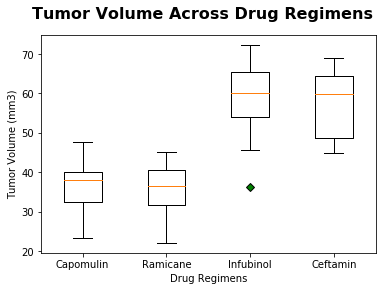

In [341]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
fig1.suptitle("Tumor Volume Across Drug Regimens", fontsize=16, fontweight="bold")
value1 = dr_data_merge.loc[dr_data_merge["Drug Regimen"]== "Capomulin"]["Tumor Volume (mm3)"]
value2 = dr_data_merge.loc[dr_data_merge["Drug Regimen"]== "Ramicane"]["Tumor Volume (mm3)"]
value3 = dr_data_merge.loc[dr_data_merge["Drug Regimen"]== "Infubinol"]["Tumor Volume (mm3)"]
value4 = dr_data_merge.loc[dr_data_merge["Drug Regimen"]== "Ceftamin"]["Tumor Volume (mm3)"]
green_diamond = dict(markerfacecolor='g', marker='D')
box_plot_data=[value1,value2,value3,value4]
plt.boxplot(box_plot_data,labels=["Capomulin","Ramicane","Infubinol","Ceftamin"],flierprops=green_diamond)
plt.xlabel("Drug Regimens")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Line and scatter plots

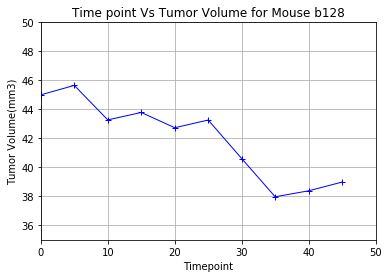

In [342]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id = "b128"
lp_df = merged_data.loc[(merged_data["Drug Regimen"]=="Capomulin") & (merged_data['Mouse ID']==mouse_id)]
x_axis = lp_df["Timepoint"]
y_axis = lp_df["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis, marker="+",color="blue", linewidth=1)

# Add labels to X and Y axes :: Add title
plt.title("Time point Vs Tumor Volume for Mouse b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume(mm3)")

# Set the limits for the X and Y axes
plt.xlim(0,50)
plt.ylim(35,50)

plt.grid()
plt.show()

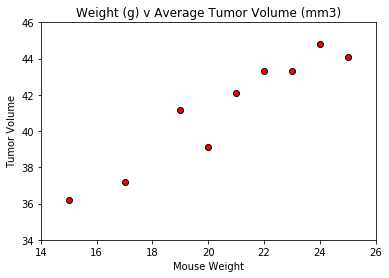

In [343]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Filter the data for Drug Capomulin
cap_df = merged_data.loc[(merged_data["Drug Regimen"]=="Capomulin")]

# Group by Mouse Weight to calculate average Tumor volume
cap_df_gp = cap_df.groupby("Weight (g)")

# Create a series with Index as Mouse Weight and Value as Average Tumor Volume
weight_vol_series = cap_df_gp["Tumor Volume (mm3)"].mean()

plt.scatter(weight_vol_series.index, weight_vol_series.values, marker="o", facecolors="red", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(34,46)
plt.xlim(14,26)

# Create a title, x label, and y label for our chart
plt.title("Weight (g) v Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.show()

The correlation between both factors is 0.95


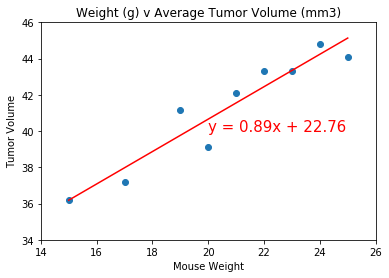

In [344]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_vol_series.index
y_values = weight_vol_series.values
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
# Set the upper and lower limits of our y axis
plt.ylim(34,46)
plt.xlim(14,26)

# Create a title, x label, and y label for our chart
plt.title("Weight (g) v Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")
plt.show()